In [1]:
from preprocessing_NLP import dealwithssl

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [2]:
import requests
import pandas as pd

In [3]:
url = "https://www.opindia.com/latest-news/page/3/?nocache"
header = {"User-Agent":"Mozilla/5.0"}
data = requests.get(url, header)
data

<Response [200]>

In [4]:
data.content

b'<!doctype html >\n<html lang="en-GB">\n<head>\n<meta charset="UTF-8" />\n<title>Today&#039;s Latest English News Reports from India | Archives of OpIndia - Page 3</title>\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n<link rel="pingback" href="https://www.opindia.com/xmlrpc.php" />\n<link rel="canonical" href="https://www.opindia.com/latest-news/page/3/?nocache&#038;User-Agent=Mozilla%2F5.0" /><link rel="prev" href="https://www.opindia.com/latest-news/page/2/?nocache&#038;User-Agent=Mozilla%2F5.0" /><link rel="next" href="https://www.opindia.com/latest-news/page/4/?nocache&#038;User-Agent=Mozilla%2F5.0" /><link rel="icon" type="image/png" href="https://www.opindia.com/wp-content/uploads/2018/10/opindia-logo-300x300.png">\n\n<meta name="description" content="Latest Breaking News and Opinions from OpIndia.com. List of all news reports and opinions published by OpIndia in a chronological order." />\n<meta name="robots" content="index, follow, max-snippet:-1, m

In [5]:
from bs4 import BeautifulSoup

In [6]:
soup = BeautifulSoup(data.content, "html.parser")

In [7]:
soup

<!DOCTYPE html >

<html lang="en-GB">
<head>
<meta charset="utf-8"/>
<title>Today's Latest English News Reports from India | Archives of OpIndia - Page 3</title>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<link href="https://www.opindia.com/xmlrpc.php" rel="pingback"/>
<link href="https://www.opindia.com/latest-news/page/3/?nocache&amp;User-Agent=Mozilla%2F5.0" rel="canonical"/><link href="https://www.opindia.com/latest-news/page/2/?nocache&amp;User-Agent=Mozilla%2F5.0" rel="prev"/><link href="https://www.opindia.com/latest-news/page/4/?nocache&amp;User-Agent=Mozilla%2F5.0" rel="next"/><link href="https://www.opindia.com/wp-content/uploads/2018/10/opindia-logo-300x300.png" rel="icon" type="image/png"/>
<meta content="Latest Breaking News and Opinions from OpIndia.com. List of all news reports and opinions published by OpIndia in a chronological order." name="description">
<meta content="index, follow, max-snippet:-1, max-image-preview:large, max-video-previ

In [8]:
headlines = []
for i in soup.find_all("div", class_="td-module-meta-info"):
    headlines.append(i.find("a")["title"])

In [9]:
headlines

['Shashi Tharoor wears Mani Shankar Aiyar’s hat, denigrates India and praises Pakistan at Lahore Literature Festival, claims Modi govt targeting Muslims',
 'BARC email to Republic TV nails Mumbai Police chief Param Bir Singh’s lies, says no case or proof of TRP manipulation against Republic media network',
 'Bihar elections to Tanishq advertisement: 8 key takeaways from latest interview with home minister Amit Shah',
 'Pradeep Bhandari comes out of Khar police station after 10 hours of questioning, says cops told him that they had ‘orders from the top’ to interrogate him',
 'Trouble mounts for Joe Biden, son’s emails reveal shady deal with Chinese firm and a ‘payout’ for the Democrat presidential nominee: Report',
 'This is why ‘liberal’ condemnation that we see around Paris beheading was missing when Kamlesh Tiwari was murdered',
 'Admin expenses, dependency on local transfer and word clouds: An analysis of Foreign Funding to Indian NGOs with graphs and charts',
 'Those who brought us

In [10]:
header = {"User-Agent":"Mozilla/5.0"}
headlines = []
for i in range(1, 101):
    url = "https://www.opindia.com/latest-news/page/"+ str(i) + "/?nocache"
    data = requests.get(url, header)
    soup = BeautifulSoup(data.content, "html.parser")
    for j in soup.find_all("div", class_="td-module-meta-info"):
        headlines.append(j.find("a")["title"])
headlines

['Rahul Gandhi denied permission to virtually inaugurate school in Wayanad by Kerala administration',
 'Shiv Sena, Congress allege actor Vivek Oberoi and filmmaker Sandeep Ssingh links in drug scandal, demand NCB probe',
 'Congress fields ‘Jinnah supporter’ and former AMUSU president Maskoor Usmani in upcoming Bihar elections',
 '‘I am PM Modi’s Hanuman. If needed, I will tear open my chest to show Modi ji resides in my heart’: LJP leader Chirag Paswan',
 'Did US President Donald Trump just share a satire article believing to be real news? Maybe not.',
 'Admin expenses, dependency on local transfer and word clouds: An analysis of Foreign Funding to Indian NGOs with graphs and charts',
 'Those who brought us Kerala model of health have now come up with Bangladesh model of economy: How they are wrong, so, so wrong',
 'Indian secularism cares more about losing a YouTube ad than the murder of 18-year-old Rahul Rajput',
 'Chetan Bhagat and left-leaning ‘intellectuals’ resort to elitist snob

In [37]:
df = pd.DataFrame()
df["headlines"] = headlines

In [10]:
# df.headlines
# df.to_csv("C:/Users/Admin/Documents/Datasets/opIndiaHeadlines.csv")
df = pd.read_csv("C:/Users/Admin/Documents/Datasets/opIndiaHeadlines.csv")
df.shape

(10400, 2)

In [11]:
words = []
from preprocessing_NLP import rem_spl_chars, sw, tokenize, preproc, stem, lem
for idx, row in df.iterrows():
    for j in sw(lem(stem(tokenize(rem_spl_chars(row["headlines"]))))):
        words.append(j)

In [12]:
len(words) # 137292

137292

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
X = tf.fit_transform(words)

In [14]:
X.shape   # (137292, 9104)   =>   9104 features for each word

(137292, 9104)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90


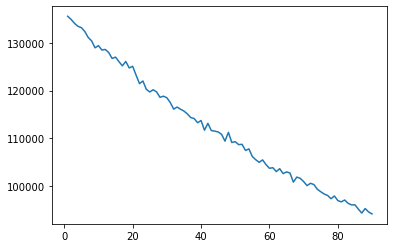

In [18]:
from sklearn.cluster import KMeans
wcss = []
k = range(1, 91)
for i in k:
    print(i)
    km = KMeans(n_clusters=i)
    model = km.fit(X)
    wcss.append(model.inertia_)
import matplotlib.pyplot as plt
plt.plot(k, wcss)
df_words = pd.DataFrame(model.labels_, columns=["cluster"])

In [22]:
df_words.cluster.value_counts()
df_words.shape

(137292, 1)

In [23]:
len(tf.get_feature_names())
tf.get_feature_names()

['aadhar',
 'aaditya',
 'aadmi',
 'aaj',
 'aajtak',
 'aakar',
 'aala',
 'aalia',
 'aam',
 'aamir',
 'aangan',
 'aap',
 'aapko',
 'aaradhya',
 'aarey',
 'aarogya',
 'aashram',
 'aasim',
 'aatish',
 'aatmanirbhar',
 'aatmnirbhar',
 'aayegi',
 'aayog',
 'abandon',
 'abba',
 'abbasmustan',
 'abduct',
 'abductor',
 'abdul',
 'abdulla',
 'abdullah',
 'abdullakutti',
 'abdur',
 'abe',
 'abet',
 'abhay',
 'abhijit',
 'abhinav',
 'abhisar',
 'abhishek',
 'abhiyaan',
 'abhiyan',
 'abid',
 'abl',
 'aboard',
 'abolish',
 'abolit',
 'abort',
 'abov',
 'abp',
 'abraham',
 'abroad',
 'abrog',
 'abruptli',
 'abscond',
 'absenc',
 'absentia',
 'absolut',
 'absolv',
 'absurd',
 'abu',
 'abus',
 'abuserinchief',
 'abvp',
 'abyss',
 'ac',
 'academ',
 'academi',
 'acceler',
 'accept',
 'access',
 'accid',
 'accident',
 'accommod',
 'accompani',
 'accomplish',
 'accord',
 'account',
 'accredit',
 'accumul',
 'accus',
 'ace',
 'achangin',
 'acharya',
 'achha',
 'achiev',
 'acid',
 'acknowledg',
 'acp',
 'acq

# 202010181200 - Continued...  Topic Modelling

In [25]:
df_feature_names = tf.get_feature_names()
df_feature_names[824]

'barkha'

In [24]:
model.cluster_centers_.shape  # 9 clusters with each centroid of 9104 dimensions

(90, 9104)

In [66]:
# print([cent for cent in model.cluster_centers_])
model.cluster_centers_.argsort()[:, :-31:-1]   # :-31:-1===> means to take last 30 in reverse order
# try difference between:
# print([i for i in model.cluster_centers_.argsort()[0]]) and print([i for i in model.cluster_centers_.argsort()[:, :-31:-1][0]])

# argsort returns the indices of values in ascending order.. it does not returns the values themselves.. but.. the indices of those values in the array
# since, v have not given any axis, it will flatten the array but..  will finally provide us the indices of values in each row
# so.. model.cluster_centers_.argsort() -- this will return an array of indices of sorted values in each row and each row represents an important word here bcoz that word is centroid
# now.. each row is a one hot sparse vector.. so.. which means that there will b all zeros and only one '1' value in each row 
# and since.. the indices are of values arranged in scending order,
#      in array returned by model.cluster_centers_.argsort(), each row last element will be the index of that words index
# so..
#      in array returned by model.cluster_centers_.argsort(), each row represents a centroin word that is an important word
# so.. exactly, each row in array returned by model.cluster_centers_.argsort(), last element is the tf-idf index of a centroid word.

# this can be verified using the index on tf.features like:  tf.get_feature_names()[8638]

array([[8638, 9103, 3030, ..., 3040, 3046, 3045],
       [7376, 9103, 3021, ..., 3047, 3040, 3046],
       [3001, 9103, 3039, ..., 3048, 3041, 3047],
       ...,
       [4559, 9103, 3031, ..., 3048, 3041, 3047],
       [ 523, 9103, 3037, ..., 3041, 3047, 3046],
       [8080, 9103, 3030, ..., 3047, 3040, 3046]], dtype=int64)

In [95]:
# model.cluster_centers_.argsort()
# model.cluster_centers_[0][8638]

In [96]:
# tf.get_feature_names()[8638]

# Find frequent keywords

In [92]:
common_words = model.cluster_centers_.argsort()[:, :-31:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ":             " + ",".join(df_feature_names[centroid_feature_idx] for centroid_feature_idx in centroid))

0:             uttar,zuckerberg,frivol,frozen,froze,froth,frontlin,frontier,front,fring,frustrat,frighten,fright,friendship,friendli,friend,fruit,fta,fri,fume,fundamentalist,fundament,fund,functionari,function,fun,fumbl,fudg,fulli,fullbodi
1:             share,zuckerberg,freudian,frozen,froze,froth,frontlin,frontier,front,frivol,fring,frighten,fright,friendship,friendli,friend,friday,fruit,frustrat,fta,fume,fundamentalist,fundament,fund,functionari,function,fun,fumbl,fudg,fulli
2:             frame,zuckerberg,fta,fruit,frozen,froze,froth,frontlin,frontier,front,frivol,fring,frighten,fright,friendship,friendli,friend,frustrat,fudg,fri,fun,fundrais,fundamentalist,fundament,fund,functionari,function,fume,fuel,fumbl
3:             presid,zuckerberg,frivol,frozen,froze,froth,frontlin,frontier,front,fring,freudian,frighten,fright,friendship,friendli,friend,friday,fruit,frustrat,fta,fume,fundamentalist,fundament,fund,functionari,function,fun,fumbl,fudg,fulli
4:             kashmiri,zuckerberg

In [94]:
# print([cen for num, cen in enumerate(common_words)])

# Identify topics

In [98]:
from sklearn.decomposition import NMF
nm = NMF(n_components=3, random_state=30)
model = nm.fit(X)

In [101]:
new_articles = ["Republic TVsued for content"]
q = nm.transform(tf.transform(new_articles)).argsort(axis=1)[:,-1]
print("Following article belongs to cluster number: %d"%q)

Following article belongs to cluster number: 2


In [106]:
nm.transform(tf.transform(new_articles)).argsort(axis=1)[:,-1]

array([2], dtype=int64)

# Trial

In [ ]:
# A trial using: https://mlexplained.com/2017/12/28/a-practical-introduction-to-nmf-nonnegative-matrix-factorization/

In [129]:
import numpy as np
nmf = NMF(n_components=20, solver="mu")
W = nmf.fit_transform(X) 
H = nmf.components_ 
# print the topics 
for i, topic in enumerate(H): 
    print("Topic {}: {}".format(i + 1, ",".join([str(x) for x in np.array(df_feature_names)[topic.argsort()[-10:]]])))

Topic 1: india,kerala,wa,polic,medium,news,attack,modi,full,claim
Topic 2: channel,doe,share,kerala,worker,india,news,medium,modi,read
Topic 3: tell,presid,share,rahul,tv,terrorist,polic,wa,full,report
Topic 4: court,wrong,doe,return,presid,share,worker,india,modi,govt
Topic 5: arrest,terrorist,tv,kerala,worker,india,modi,medium,polic,hindu
Topic 6: presid,kerala,india,attack,worker,news,modi,polic,medium,indian
Topic 7: gandhi,happen,doe,drug,rahul,news,attack,modi,medium,stori
Topic 8: doe,channel,drug,worker,share,leader,news,attack,full,muslim
Topic 9: drug,arrest,rule,coronaviru,worker,presid,tv,rahul,medium,detail
Topic 10: worker,wa,share,rahul,medium,terrorist,news,attack,full,reskil
Topic 11: tell,presid,kerala,tv,india,rahul,medium,attack,modi,say
Topic 12: wa,terrorist,medium,india,worker,kerala,full,news,modi,call
Topic 13: kerala,medium,coronaviru,arrest,terrorist,rahul,tv,polic,wa,congress
Topic 14: rule,happen,coronaviru,share,kerala,india,worker,news,medium,delhi
Topic 